In [1]:
!pip install -U tensorflow_datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [30]:
from __future__ import absolute_import, division, print_function
import tensorflow as tf
import tensorflow_datasets as tfds
import math
import numpy as np
import matplotlib.pyplot as plt
import tqdm
import tqdm.auto
tqdm.tqdm = tqdm.auto.tqdm

In [82]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
train_data, test_data = dataset["train"], dataset["test"]

In [83]:
dataset

{'train': <PrefetchDataset element_spec=(TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>,
 'test': <PrefetchDataset element_spec=(TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>}

In [84]:
classes = ['tshirt', 'trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [85]:
train_ex = metadata.splits['train'].num_examples
test_ex = metadata.splits['test'].num_examples
print(train_ex)
print(test_ex)

60000
10000


In [86]:
def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels

train_dataset = train_data.map(normalize)
test_dataset = test_data.map(normalize)

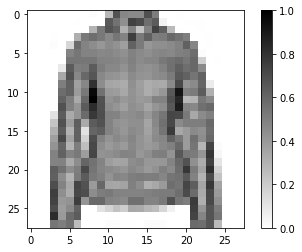

In [87]:
# For one image
for image,label in test_dataset.take(4):
  break
image = image.numpy().reshape((28,28))

plt.figure()
plt.imshow(image, cmap = plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

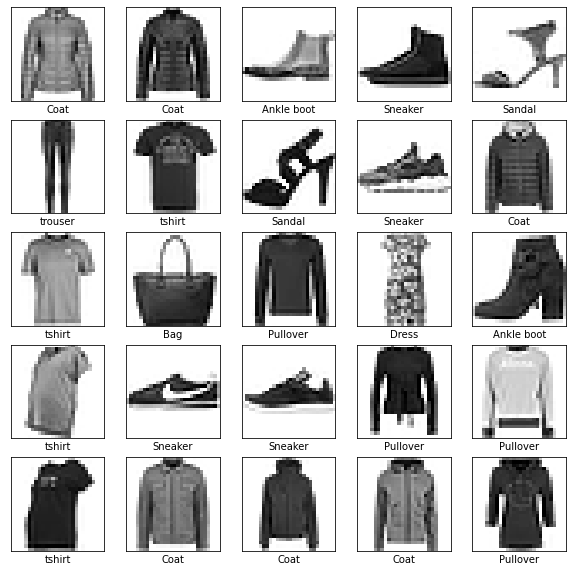

In [88]:
# For 25 images
plt.figure(figsize = (10,10))
i = 0
for (image,label) in test_dataset.take(25):
  image = image.numpy().reshape((28,28))
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image, cmap= plt.cm.binary)
  plt.xlabel(classes[label])
  i+=1

plt.show()


In [89]:
# setup model 
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape =(28,28,1)),
    tf.keras.layers.Dense(128, activation =tf.nn.relu),
    tf.keras.layers.Dense(10, activation =tf.nn.softmax)
])

In [90]:
# compile model
model.compile(loss= "sparse_categorical_crossentropy", optimizer= 'adam',
              metrics =['accuracy'])

In [91]:
Batch_size = 32
train_dataset = train_dataset.repeat().shuffle(train_ex).batch(Batch_size)
test_dataset = test_dataset.batch(Batch_size)

TypeError: ignored

In [93]:
# Predictions
model.fit(train_dataset, epochs=5, steps_per_epoch= math.ceil(train_ex/Batch_size))

Epoch 1/5
1875/1875 [==============================] - 10s 3ms/step - loss: 0.4933 - accuracy: 0.8246
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3726 - accuracy: 0.8654
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3309 - accuracy: 0.8782
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3138 - accuracy: 0.8851
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2967 - accuracy: 0.8898


In [94]:
# Evaluation 
test_loss , test_accuracy = model.evaluate(test_dataset, steps= math.ceil(test_ex/32))
print(test_accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.3469 - accuracy: 0.8768
0.876800000667572


In [96]:
# Predictions
for test_images, test_labels in test_dataset.take(1):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  predictions = model.predict(test_images)

1/1 [==============================] - 0s 23ms/step


In [97]:
predictions.shape

(32, 10)

In [99]:
np.argmax(predictions[0])

4

In [100]:
test_labels[0]

4